# **INTRODUCTION**

*The Zomato price prediction project holds significant importance for both consumers and restaurant owners. For consumers, having an accurate price prediction model can help in making informed decisions while planning their dining experiences. It enables them to explore restaurants within their budget, ensuring an enjoyable experience without breaking the bank. On the other hand, for restaurant owners, understanding the factors that contribute to price categorization can assist in pricing strategies and competitiveness within the market.

To build an effective price prediction model, we will utilize a dataset that contains various attributes of restaurants, including location, cuisine, ratings, reviews, and more. Leveraging this dataset, we will employ machine learning algorithms and techniques to train a model that can accurately estimate the price range of a given restaurant based on its features.

The project will involve several stages, starting from data preprocessing and exploration, where we will analyze and clean the dataset to ensure its quality and relevance. Then, we will select appropriate features and apply suitable machine learning algorithms for training the model. We will fine-tune the model using various evaluation metrics to ensure its accuracy and reliability. Finally, we will validate the model using a testing dataset to assess its performance in predicting restaurant prices.*

***import all necessary liberary***

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

***import dataset***

In [2]:
data = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')

# **EDA**

In [3]:
data.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
data.shape

(51717, 17)

In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
data.drop(['url','address','name','phone','menu_item'],axis=1,inplace=True)

In [8]:
data.tail(2)

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
51715,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield
51716,No,No,3.4 /5,13,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",Pubs and bars,Whitefield


In [9]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
def handlerate(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value = str(value).split('/')[0]
        return float(value)

In [11]:
data.isnull().sum()

online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [12]:
data.drop(['location'],axis=1,inplace=True)

In [13]:
data.head(1)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


In [14]:
data['rate'] = data['rate'].apply(handlerate)
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [15]:
data.head(1)

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari


In [16]:
data['approx_cost(for two people)'].dtype

dtype('O')

In [17]:
data['approx_cost(for two people)'].isna().sum()

346

In [18]:
data.dropna(axis=0,how ='any',subset=['approx_cost(for two people)'],inplace=True)

In [19]:
data['approx_cost(for two people)'].isna().sum()

0

In [20]:
data.isna().sum()

online_order                       0
book_table                         0
rate                            9953
votes                              0
rest_type                        204
dish_liked                     27868
cuisines                          19
approx_cost(for two people)        0
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [21]:
data.drop(['dish_liked'],axis=1,inplace=True)

In [22]:
data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [23]:
def handlecost(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)

In [24]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(handlecost)
data['approx_cost(for two people)'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: approx_cost(for two people), dtype: float64

In [25]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [26]:

data['rest_type'] = data.rest_type.str.split(',')
data.head(2)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Yes,Yes,4.1,775,[Casual Dining],"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Yes,No,4.1,787,[Casual Dining],"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari


In [27]:
for index,row in data.iterrows():
    if type(row['rest_type'])==list :
        for rest_type in row['rest_type']:
            data.at[index,rest_type] =1
        


In [28]:
data = data.fillna(0)
data.head(1)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),...,Microbrewery,Food Court,Club,Irani Cafee,Lounge,Kiosk,Bhojanalya,Pop Up,Mess,Meat Shop
0,Yes,Yes,4.1,775,[Casual Dining],"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
data.head(2)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),...,Microbrewery,Food Court,Club,Irani Cafee,Lounge,Kiosk,Bhojanalya,Pop Up,Mess,Meat Shop
0,Yes,Yes,4.1,775,[Casual Dining],"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Yes,No,4.1,787,[Casual Dining],"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
data.drop(['rest_type','cuisines','reviews_list'],axis=1,inplace=True)

In [31]:
data.describe()

,rate,votes,approx_cost(for two people),Casual Dining,Cafe,Casual Dining,Quick Bites,Cafe,Quick Bites,Delivery,...,Microbrewery,Food Court,Club,Irani Cafee,Lounge,Kiosk,Bhojanalya,Pop Up,Mess,Meat Shop
count,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,...,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000,51371.000000
mean,2.983419,283.973487,555.431566,0.232291,0.084075,0.019875,0.378365,0.013665,0.021646,0.050359,...,0.002959,0.000487,0.000798,0.000292,0.001051,0.000195,0.000058,0.000039,0.000078,0.000078
std,1.515090,804.908901,438.850728,0.422297,0.277502,0.139572,0.484984,0.116098,0.145528,0.218687,...,0.054315,0.022055,0.028240,0.017085,0.032405,0.013951,0.007642,0.006240,0.008824,0.008824
min,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,7.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.600000,41.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.900000,198.000000,650.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.900000,16832.000000,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51371 entries, 0 to 51716
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 51371 non-null  object 
 1   book_table                   51371 non-null  object 
 2   rate                         51371 non-null  float64
 3   votes                        51371 non-null  int64  
 4   approx_cost(for two people)  51371 non-null  float64
 5   listed_in(type)              51371 non-null  object 
 6   listed_in(city)              51371 non-null  object 
 7   Casual Dining                51371 non-null  float64
 8   Cafe                         51371 non-null  float64
 9    Casual Dining               51371 non-null  float64
 10  Quick Bites                  51371 non-null  float64
 11   Cafe                        51371 non-null  float64
 12   Quick Bites                 51371 non-null  float64
 13  Delivery        

# **DATA IMPUTATION**

In [33]:
num_cols = list(data.select_dtypes(exclude='object').columns)
num_cols.remove('approx_cost(for two people)')
cat_cols = list(data.select_dtypes(include='object').columns)

In [34]:
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

imputer_num.fit_transform(data[num_cols])
imputer_cat.fit_transform(data[cat_cols])

array([['Yes', 'Yes', 'Buffet', 'Banashankari'],
       ['Yes', 'No', 'Buffet', 'Banashankari'],
       ['Yes', 'No', 'Buffet', 'Banashankari'],
       ...,
       ['No', 'No', 'Pubs and bars', 'Whitefield'],
       ['No', 'Yes', 'Pubs and bars', 'Whitefield'],
       ['No', 'No', 'Pubs and bars', 'Whitefield']], dtype=object)

In [35]:
cat_cols

['online_order', 'book_table', 'listed_in(type)', 'listed_in(city)']

# **FEATURE ENCODING**

In [36]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe.fit(data[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [37]:
new_col = list(ohe.get_feature_names())
new_col

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_No',
 'x0_Yes',
 'x1_No',
 'x1_Yes',
 'x2_Buffet',
 'x2_Cafes',
 'x2_Delivery',
 'x2_Desserts',
 'x2_Dine-out',
 'x2_Drinks & nightlife',
 'x2_Pubs and bars',
 'x3_BTM',
 'x3_Banashankari',
 'x3_Bannerghatta Road',
 'x3_Basavanagudi',
 'x3_Bellandur',
 'x3_Brigade Road',
 'x3_Brookefield',
 'x3_Church Street',
 'x3_Electronic City',
 'x3_Frazer Town',
 'x3_HSR',
 'x3_Indiranagar',
 'x3_JP Nagar',
 'x3_Jayanagar',
 'x3_Kalyan Nagar',
 'x3_Kammanahalli',
 'x3_Koramangala 4th Block',
 'x3_Koramangala 5th Block',
 'x3_Koramangala 6th Block',
 'x3_Koramangala 7th Block',
 'x3_Lavelle Road',
 'x3_MG Road',
 'x3_Malleshwaram',
 'x3_Marathahalli',
 'x3_New BEL Road',
 'x3_Old Airport Road',
 'x3_Rajajinagar',
 'x3_Residency Road',
 'x3_Sarjapur Road',
 'x3_Whitefield']

In [38]:
data[new_col] = ohe.transform(data[cat_cols])

In [39]:
data.head(2)

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city),Casual Dining,Cafe,Casual Dining,...,x3_Lavelle Road,x3_MG Road,x3_Malleshwaram,x3_Marathahalli,x3_New BEL Road,x3_Old Airport Road,x3_Rajajinagar,x3_Residency Road,x3_Sarjapur Road,x3_Whitefield
0,Yes,Yes,4.1,775,800.0,Buffet,Banashankari,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Yes,No,4.1,787,800.0,Buffet,Banashankari,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **FEATURE SELECTION**

In [40]:
 final_col = list(data.corr()['approx_cost(for two people)'][(data.corr()['approx_cost(for two people)']>=0.01)|(data.corr()['approx_cost(for two people)']<=-0.01)].index)
    

In [41]:
final_col.remove('approx_cost(for two people)')


<AxesSubplot:>

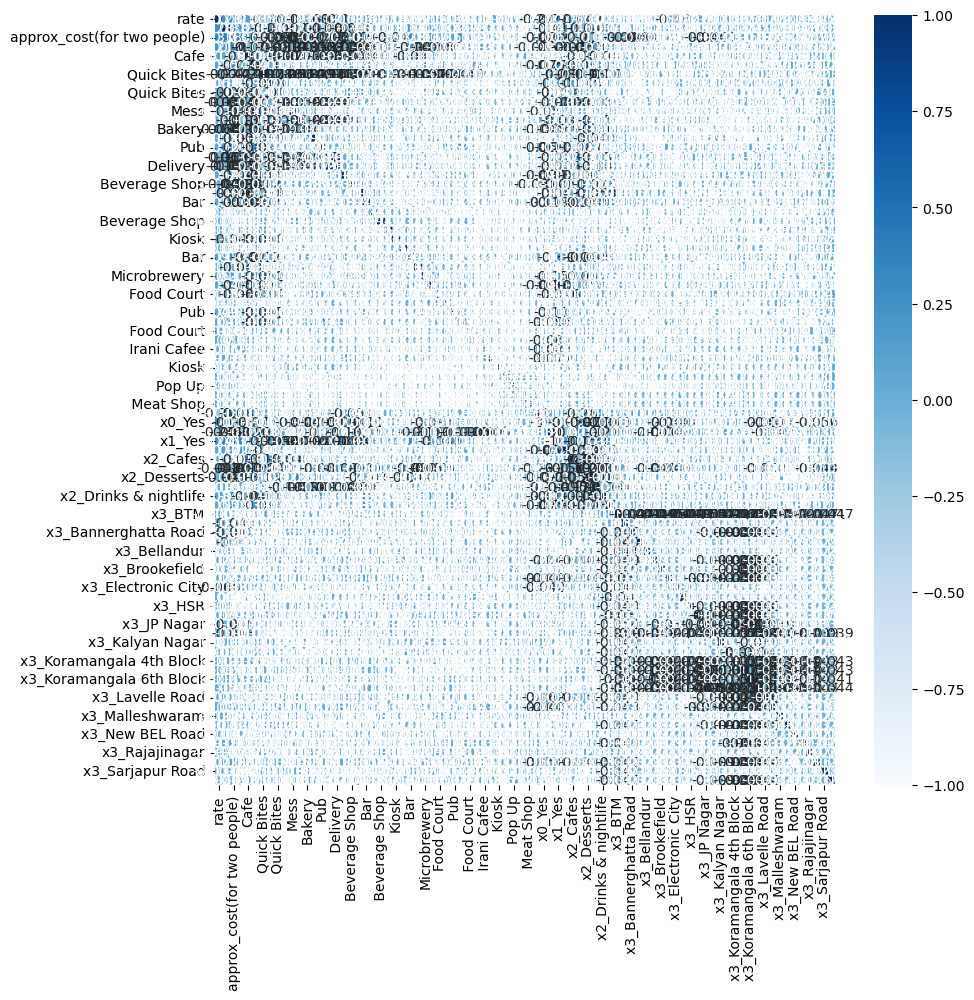

In [42]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),center=0,cmap='Blues', annot=True)

# plt.figure(figsize=(12,10))

# sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
# 			linewidths=2,annot=True)

***DATA SPLITTING FOR VALIDATION***

In [43]:
X_train,X_test, y_train,y_test = train_test_split(data[final_col],data['approx_cost(for two people)'],test_size=0.2,random_state=45)

# **FEATURE SCALLING**

In [44]:
scaler=StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

# **MODEL BUILDING**

***LINEAR REGRESSION***

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train,y_train)

LinearRegression()

In [49]:
model.score(X_test,y_test)

0.7628429916115672

***RANDOMFOREST REGRESSOR WITH HYPER PARAMETER TUNNING***

In [50]:
dict={'n_estimators':[1200,1400],
       'max_depth':[6,7],
       'min_samples_leaf':[3,4],
       'min_samples_split':[2,3]}

dict1={'n_estimators':[1000,1200],
       'max_depth':[7,8],
       'min_samples_leaf':[3,4],
       'min_samples_split':[3,4]}

In [51]:
grid_cv = GridSearchCV(RandomForestRegressor(),param_grid=dict1,verbose=3)

In [52]:
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=1000;, score=0.785 total time= 1.1min
[CV 2/5] END max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=1000;, score=0.779 total time= 1.1min
[CV 3/5] END max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=1000;, score=0.783 total time= 1.2min
[CV 4/5] END max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=1000;, score=0.794 total time= 1.1min
[CV 5/5] END max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=1000;, score=0.772 total time= 1.2min
[CV 1/5] END max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=1200;, score=0.785 total time= 1.4min
[CV 2/5] END max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=1200;, score=0.778 total time= 1.5min
[CV 3/5] END max_depth=7, min_samples_leaf=3, min_samples_split=3, n_estimators=1200;, score=0.783 total time= 1.

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [3, 4],
                         'n_estimators': [1000, 1200]},
             verbose=3)

In [53]:
grid_cv.score(X_test,y_test)

0.8147634330588214

In [54]:
grid_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 1200}

***PICKLE MODEL FOR DEPLOYMENT***

In [58]:
# import pickle

In [56]:
# pickle.dump(grid_cv,open('zomato_grid.pkl','wb'))

In [57]:
# pickle.dump(scaler,open('zomato_grid_scaler.pkl','wb'))